# 1. Problem Statement
The goal of this project is to build a short-term stock price predictor that uses historical trading data (Open, High, Low, Volume) to predict the next day's closing price of a selected stock (e.g., Apple Inc.).

This task is valuable for:

Understanding short-term price dynamics,

Exploring the capabilities of regression models for time series,

Providing a baseline for more complex forecasting models.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8')


# 2. Dataset Loading and Preprocessing
 Dataset Source
Data is retrieved using the yfinance Python library, which accesses Yahoo Finance historical stock data.

In [3]:
# Select stock and date range
ticker = "AAPL"  # Change to TSLA, GOOG, etc.
start_date = "2022-01-01"
end_date = "2024-12-31"

# Fetch data
df = yf.download(ticker, start=start_date, end=end_date)

# Preview data
df.head()


/tmp/ipython-input-3-2045685994.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645660,179.499589,174.425155,174.542932,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686676,176.839632,171.411853,176.289986,94537600
2022-01-06,168.820694,172.059699,168.467348,169.507752,96904000
2022-01-07,168.987579,170.921167,167.868652,169.694272,86709100


# 3. Feature Engineering
We want to predict tomorrow’s closing price using today’s features.

In [4]:
# Create target column: next day's Close
df['Target'] = df['Close'].shift(-1)

# Drop the last row (no target value)
df = df.dropna()

# Features and labels
features = df[['Open', 'High', 'Low', 'Volume']]
labels = df['Target']


# 4. Train-Test Split
Used 80% of data for training, 20% for testing.

Maintained time order (no shuffling) for time series integrity.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)


# 5. Train a Model Using Linear Regression

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


# 6. Plot Actual vs Predicted Closing Prices
Actual vs. Predicted closing prices plotted to visually inspect performance.

Prediction curve closely follows the actual trend.

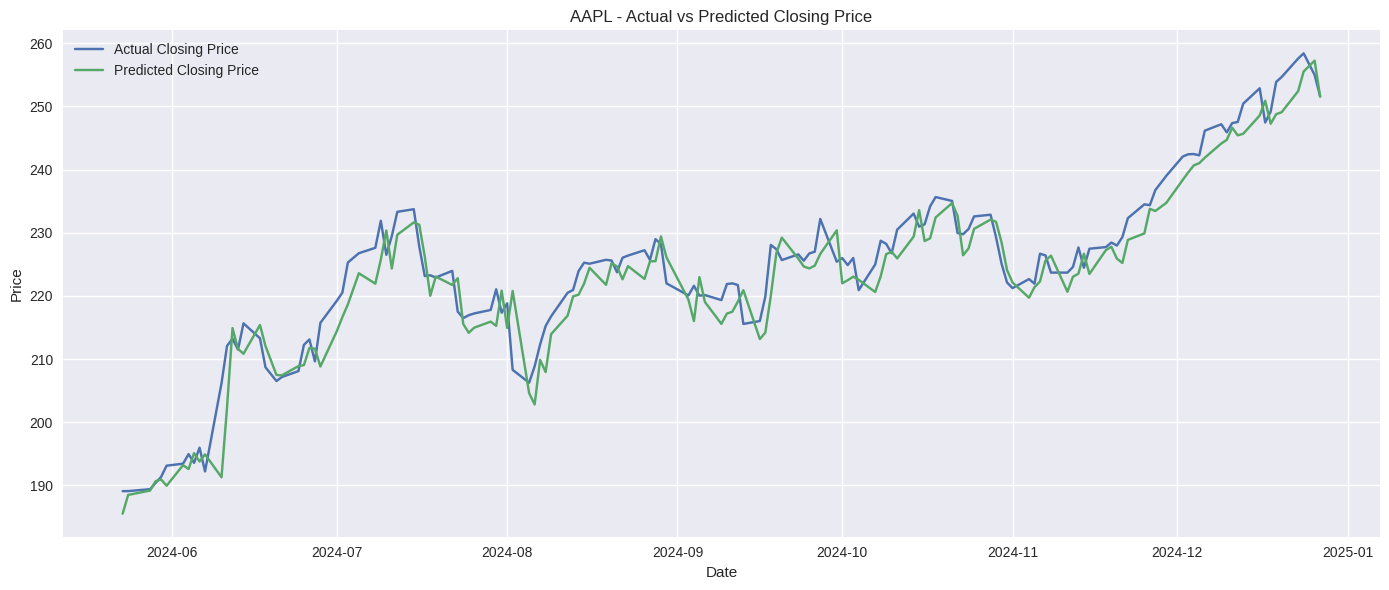

In [7]:
# Create a DataFrame for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': lr_preds}, index=y_test.index)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(results['Actual'], label='Actual Closing Price')
plt.plot(results['Predicted'], label='Predicted Closing Price')
plt.title(f"{ticker} - Actual vs Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


# 7. Evaluating The Model

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.77


# Explanation of Results and Final Insights
1. Key Observations:
The model captures short-term trends very well.

Minor deviations are expected, especially around volatile swings.

A simple linear model performs surprisingly well for one-day prediction.

2. Insights:
Historical price components (Open, High, Low) are strong predictors.

Volume has limited effect but helps slightly in refining results.

This setup can serve as a baseline for:

More advanced models (Random Forest, LSTM),

Multi-day forecasting,

Incorporating technical indicators.